# Capstone Project: Topic Modelling of Academic Journals (Model-Based Systems Engineering)

# 04: BERTopic Modeling

In this notebook, we will perform topic modeling using BERTopic. As my laptop specs are insufficient to run BERTopic, this notebook will be run using Kaggle. As such, this notebook here is saved from Kaggle and there might be some blank spaces, which are actually the visualizations. The come out as blank when the notebook is downloaded from Kaggle. To remedy this, I have included a screenshot of each visualization from Kaggle. 

## Install the required libraries

In [1]:
# Install the required libraries
! pip install numpy==1.23.5
! pip install pandas==1.5.3
! pip install bertopic==0.14.1
! pip install umap-learn==0.5.3

## Import Libraries

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np

from bertopic import BERTopic
from umap.umap_ import UMAP
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.representation import MaximalMarginalRelevance

# Set all columns and rows to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import Data

In [3]:
# Import the data for modelling
journals = pd.read_csv('/kaggle/input/capstone-data/journals_processed.csv')

## Topic Modeling using BERTopic

In [4]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=42)

# Initiate Class Tfidf Transformer to reduce frequent words in the topics key words
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Initiate the Maximal Marginal Relevance model to diversify the topic representation
representation_model = MaximalMarginalRelevance(diversity=0.2)

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, 
                       ctfidf_model=ctfidf_model, 
                       representation_model=representation_model, 
                       language="english", 
                       calculate_probabilities=True, 
                       n_gram_range=(1,3))

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(journals['tokens'])

In [5]:
# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,298,-1_design_architecture_requirement_development
1,0,115,0_sysml_modeling_modeling language_simulation
2,1,68,1_product development_development_manufacturin...
3,2,57,2_reliability_safety analysis_fault tree_ecmo
4,3,56,3_cubesat_spacecraft_satellite_nasa
5,4,49,4_research_adoption_industry_practice
6,5,33,5_requirement_process_design_hcd
7,6,26,6_ontology_database_ontologybased_interoperabi...
8,7,20,7_electric_electric vehicle_powertrain_ev
9,8,19,8_mbsecps_security threat_vulnerability_risk a...


In [ ]:
# Print the keywords for each topic
for i in range(17):
    print(f"Topic: {i}")
    print(topic_model.get_topic(i))
    print()

Topic: 0
[('sysml', 0.29815171370606586), ('modeling', 0.2524020166089968), ('modeling language', 0.23153133644793988), ('simulation', 0.2278494911385968), ('uml', 0.17818094354143807), ('language sysml', 0.17238920034836627), ('modeling language sysml', 0.16733392365595406), ('software', 0.16031671043736104), ('architecture', 0.15024607781230417), ('specification', 0.14783924749700342)]

Topic: 1
[('product development', 0.23974552378900335), ('development', 0.23804478840092055), ('manufacturing', 0.21433244599504442), ('industrial', 0.20618268858269037), ('iot', 0.18745885336812865), ('product line', 0.1776046030484311), ('toolchain', 0.1744308564032939), ('development process', 0.16900430616050008), ('product development process', 0.16647377534324526), ('business process', 0.1633057662571722)]

Topic: 2
[('reliability', 0.26951929229780974), ('safety analysis', 0.2660333327153579), ('fault tree', 0.22402161178142221), ('ecmo', 0.19675187110648112), ('design safety', 0.19630227857656

In [7]:
# Visualize the top 10 keywords for each topic
topic_model.visualize_barchart(n_words=10, top_n_topics=25, height = 400)

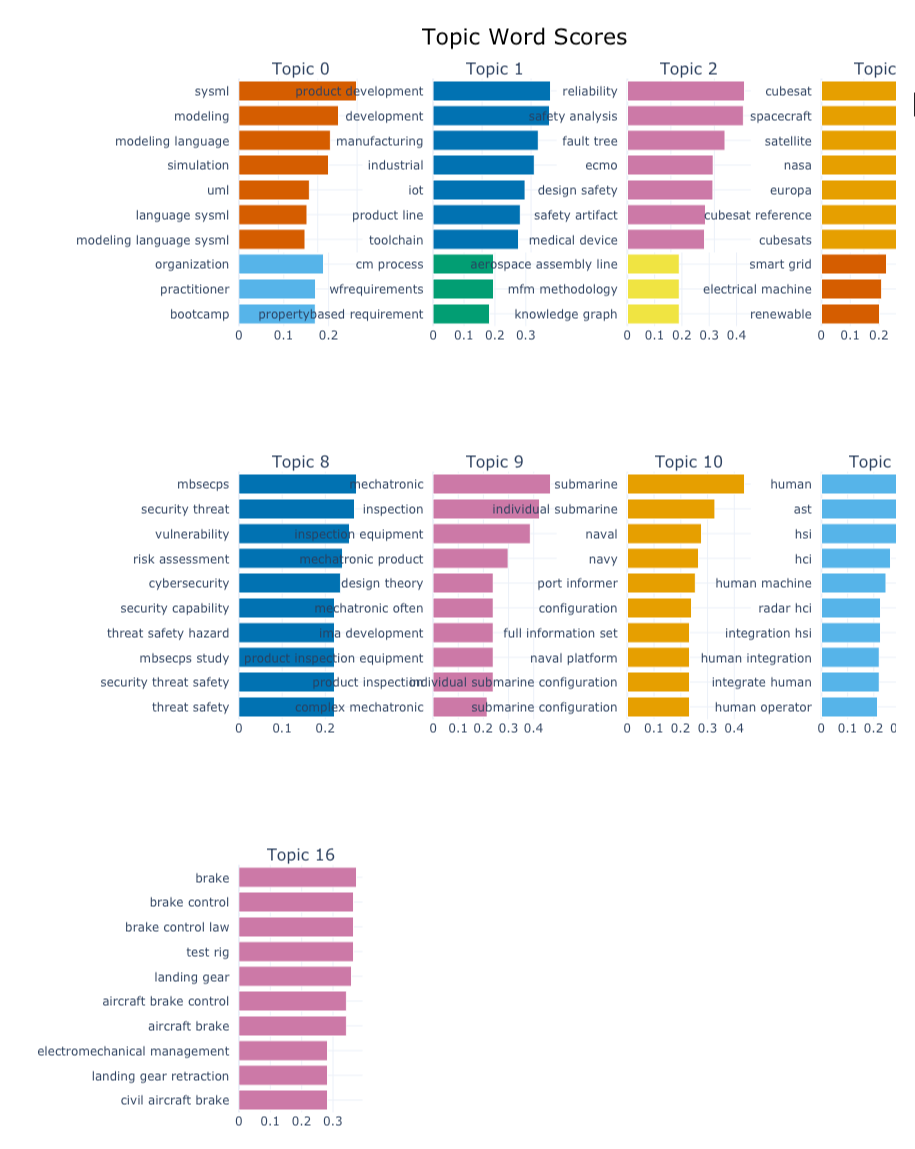

In [8]:
# Visualize intertopic distance
topic_model.visualize_topics()

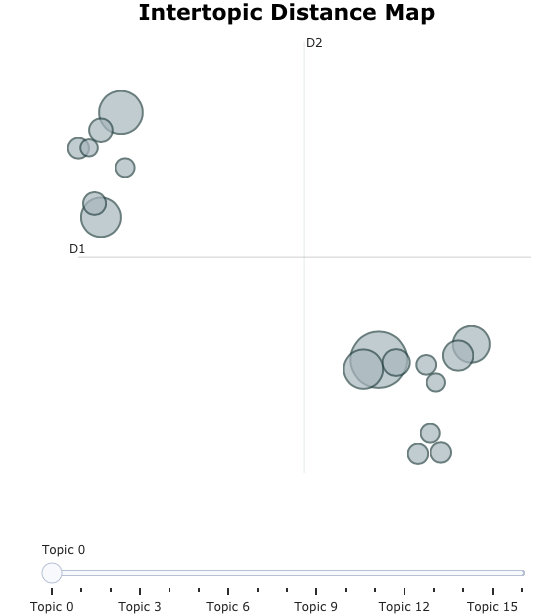

BERTopic has identified 17 topics of interest. However, we can see two things:
1. A lot of topics have very few articles assigned to them, which would make it difficult to do supervised classification learning later on. Furthermore, there would be little reading material for each topic, which could make it difficult for hte team to study the field. 
2. 298 articles (approx. one-third of the data are classified as outliers). Which such a small dataset, it is unrealistic to throw away so many articles.
3. A lot of these topics overlap each other.

Hence, we will try to generalize our topics by:
1. Summarizing each topic
2. Merging the similar topics
3. Assign the outliers to the generalized topics

This also allows us to reduce the number of topics we have. 

**Summary of each topic**

|Topic|Summary|
|-----|-------|
|0| How to use MBSE|
|1| Product Development Process|
|2| Safety and Reliability|
|3| Aerospace|
|4| Adoption of MBSE|
|5| Requirements|
|6| Ontology| 
|7| Electric Vehicles|
|8| Physical and Cyber Security|
|9| Evaluation of MBSE Implementation and Verification and Validation|
|10| Military Navel Systems|
|11| Physical Human Systems such as Unmanned Ops|
|12| Verification and Validation|
|13| Adoption of MBSE, especially in the context of complexity, reuseability and cost effectiveness|
|14| Digital Twin|
|15| Verification and Validation|
|16| Aviation|



**Topics to Manually Merge in BERTopic**

Using domain knowledge, we have assessed that the below topics are similar and can be merged. 

|S/N|Topics to Merge|Reason|
|---|---------------|------|
|1| 9, 12, 15| Both topics are about verification and validation|
|2| 3, 7, 10, 11 16| Infrastructure and domain specific projects. Conceptually, they are similar|
|3| 4, 6, 13| Defining the engineering ontology is a key portion of adoption, hence these three topics are related|
|4| 8, 14| Combining the topics that are related to the digital realm like cybersecurity and digital twin|

In [9]:
#  Define the topics to merge together
topics_to_merge = [[9, 12, 15], 
                   [3, 7, 10, 11, 16],
                   [4, 6, 13],
                   [8, 14]]

# Manually merge the similar topics in BERTopic
topics_reduced = topic_model.merge_topics(journals['tokens'], topics_to_merge)

In [10]:
# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,298,-1_design_architecture_requirement_development
1,0,117,0_cubesat_vehicle_spacecraft_satellite
2,1,115,1_sysml_modeling_simulation_modeling language
3,2,88,2_ontology_research_reuse_paper
4,3,68,3_development_product development_production_p...
5,4,57,4_reliability_safety analysis_fmea_fault tree
6,5,42,5_mechatronic_inspection_inspection equipment_...
7,6,33,6_requirement_design_engineer_specification
8,7,32,7_digital twin_cyber_resilience_mbsecps


In [11]:
# Visualize the top 10 keywords for each topic
topic_model.visualize_barchart(n_words=10, top_n_topics=25, height = 400)

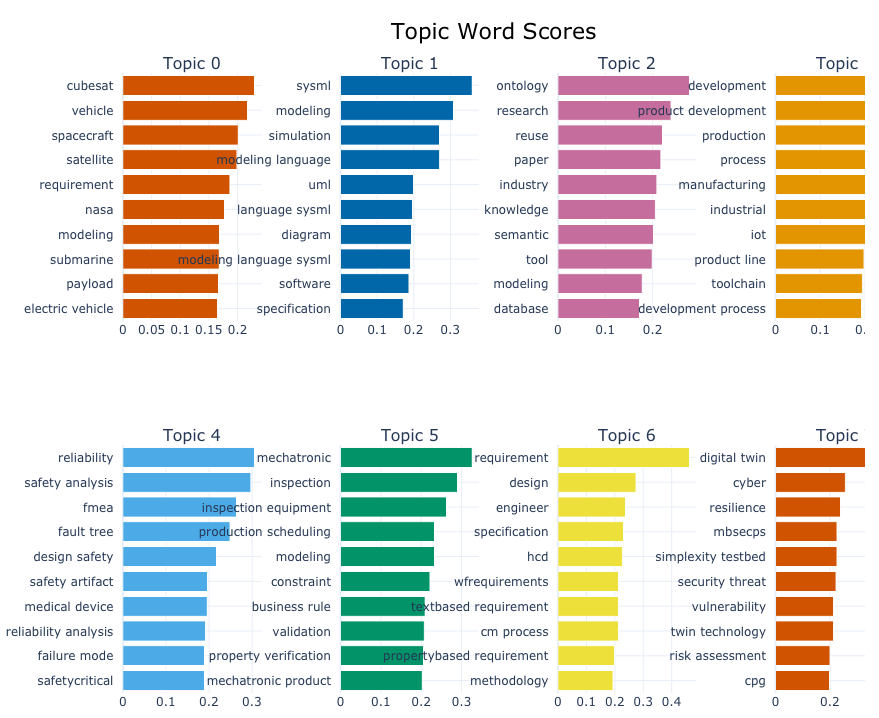

In [12]:
# Visualize intertopic distance
topic_model.visualize_topics()

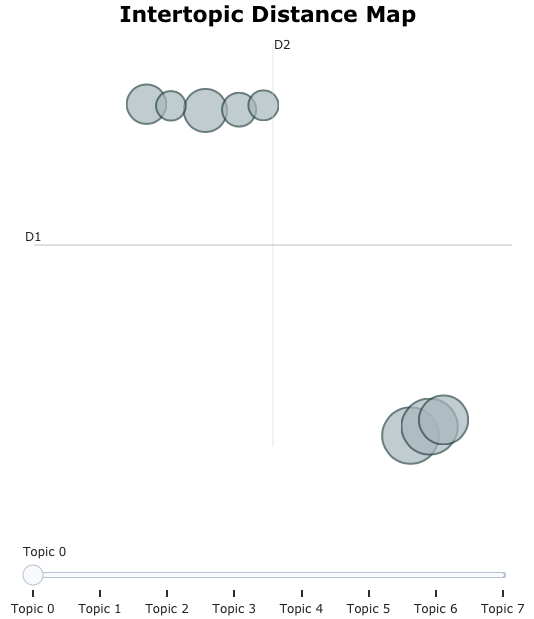

In [13]:
# Update the topics and probabilities
topics_updated = topic_model.topics_
probabilities_updated = topic_model.probabilities_

In [14]:
# Reduce outliers
new_topics = topic_model.reduce_outliers(journals['tokens'], topics_updated)
topic_model.update_topics(journals['tokens'], 
                          topics=new_topics, 
                          ctfidf_model=ctfidf_model, 
                          representation_model=representation_model)

In [15]:
# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name
0,0,175,0_mission_architecture_cubesat_requirement
1,1,203,1_sysml_language_modeling_modeling language
2,2,127,2_ontology_paper_industry_knowledge
3,3,116,3_development_production_product development_p...
4,4,74,4_safety_reliability_safety analysis_fault tree
5,5,66,5_mechatronic_inconsistency_development_design
6,6,48,6_requirement_process_design_engineer
7,7,41,7_digital twin_security_threat_cyber


In [16]:
# Visualize the top 10 keywords for each topic
topic_model.visualize_barchart(n_words=10, top_n_topics=25, height = 400)

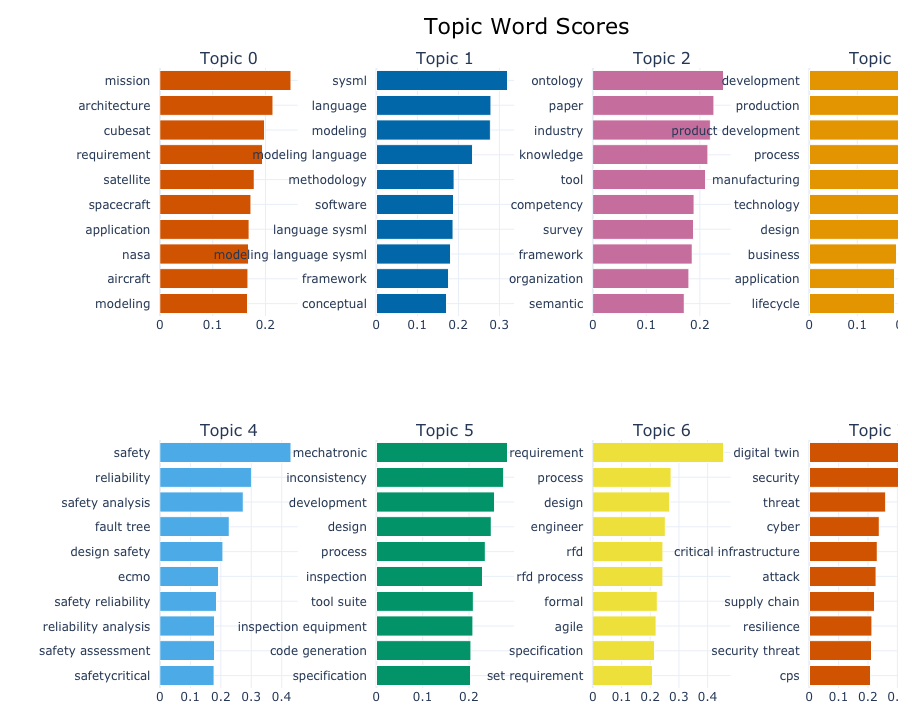

In [17]:
# Visualize intertopic distance
topic_model.visualize_topics()

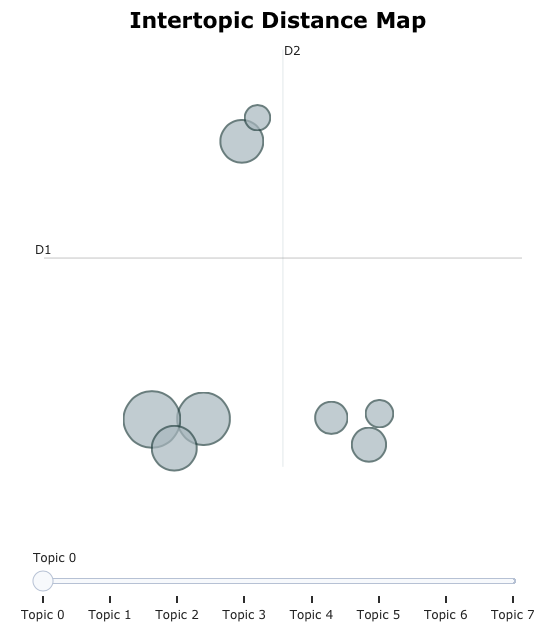

Here, we can see that the topics are rather distinct from one another as there is little overlap between them.

In [18]:
# Update the topics and probabilities
topics_final = topic_model.topics_
probabilities_final = topic_model.probabilities_

# Include the topics into the journals dataframe
journals['topic'] = topics_final
probabilities_final = pd.DataFrame(probabilities_final)

# Concat the journals dataframe with the probabilities dataframe
journals = pd.concat([journals, probabilities_final], axis=1)

In [19]:
# Check the journals dataframe
journals.head()

,title,abstract,year,tokens,topic,0,1,2,3,4,5,6,7
0,Model-based Design Process for the Early Phase...,This paper presents an approach for a model-ba...,2017,paper present approach planning process early ...,3,0.134677,0.049330,0.121864,0.157459,0.018720,0.165620,0.034708,0.056888
1,Model Based Systems Engineering using VHDL-AMS,The purpose of this paper is to contribute to ...,2013,purpose paper contribute definition ( ) approa...,6,0.166052,0.053813,0.101767,0.040338,0.025920,0.180074,0.204835,0.046355
2,Code Generation Approach Supporting Complex Sy...,Code generation is an effective way to drive t...,2022,code generation effective way drive complex de...,5,0.048002,0.023436,0.040045,0.012378,0.006812,0.110110,0.013624,0.015338
3,Model based systems engineering as enabler for...,"Product complexity is steadily increasing, cus...",2021,"product complexity steadily increasing , custo...",3,0.144370,0.045020,0.161951,0.335414,0.020165,0.169411,0.040359,0.061398
4,Electric Drive Vehicle Development and Evaluat...,To reduce development time and introduce techn...,2014,reduce development time introduce technology f...,0,0.487260,0.042662,0.097253,0.059448,0.029092,0.165888,0.037608,0.069110


In [20]:
# Export the journals dataframe as a csv file
journals.to_csv('/kaggle/working/journals_topics.csv', index=False)

## Next Steps

In the next notebook, we will conduct an evaluation of the insight of the topic models.